In [4]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#    图像金字塔-高斯金字塔
<br>

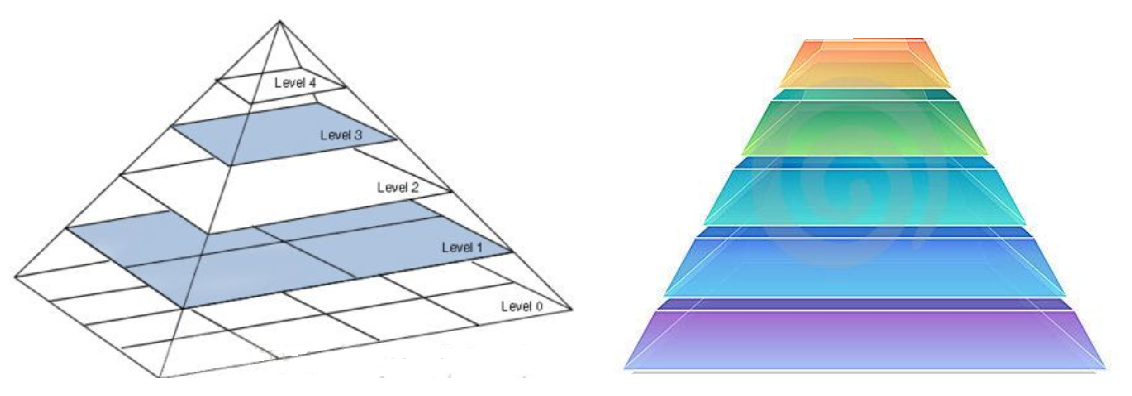

In [5]:
#定义展示图像函数
def cv2_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
#原始图像
img = cv2.imread('../0-Datas/images/AM.png')
cv2_show('img',img)
print(img.shape)

(442, 340, 3)


#### 高斯金字塔：向上采样方法（放大）

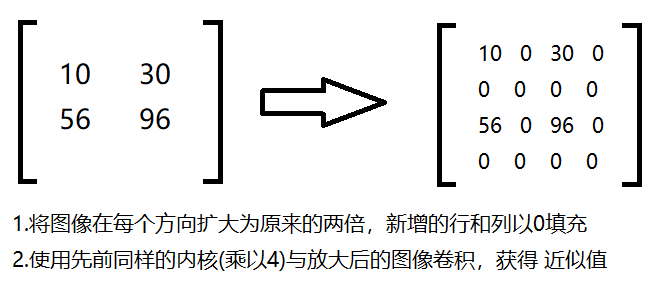

In [7]:
#向上采样法（放大）
img = cv2.imread('../0-Datas/images/AM.png')
up = cv2.pyrUp(img)
cv2_show('up',up)
print(up.shape)

(884, 680, 3)


In [8]:
#向上采样法（再次放大）
img = cv2.imread('../0-Datas/images/AM.png')
up2 = cv2.pyrUp(up)
cv2_show('up2',up2)
print(up2.shape)

(1768, 1360, 3)


#### 高斯金字塔：向下采样方法（缩小）

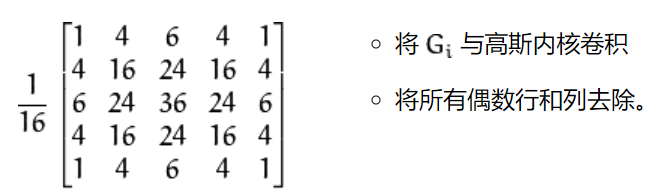

In [9]:
#向下采样法（缩小）
img = cv2.imread('../0-Datas/images/AM.png')
down = cv2.pyrDown(img)
cv2_show('down',down)
print(down.shape)

(221, 170, 3)


In [10]:
#向下采样法（再次缩小）
img = cv2.imread('../0-Datas/images/AM.png')
down2 = cv2.pyrDown(down)
cv2_show('down2',down2)
print(down2.shape)

(111, 85, 3)


In [11]:
#结合使用，可能清晰，也可能模糊（通常更模糊）
img = cv2.imread('../0-Datas/images/AM.png')
ups = cv2.pyrUp(img)
downs = cv2.pyrDown(ups)

res = np.hstack((img,downs))
cv2_show('res',res)
print(downs.shape)

(442, 340, 3)


# 图像金字塔-拉普拉斯金字塔
<br>

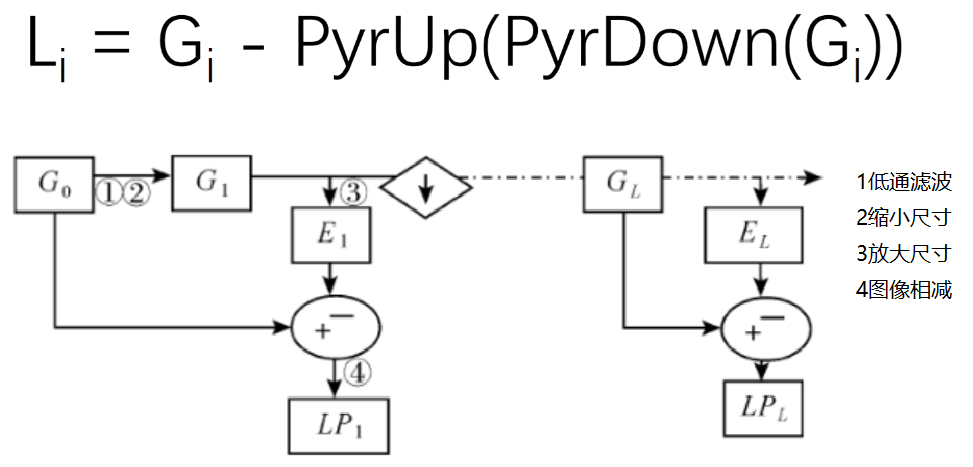

In [12]:
img = cv2.imread('../0-Datas/images/AM.png')

down = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
ls = img - down_up

cv2_show('ls',ls)
print(ls.shape)

(442, 340, 3)


# 图像轮廓

#### cv2.findContours(img,mode,method)
mode:轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓；
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中；
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界;
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次;

method:轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）。
- CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。

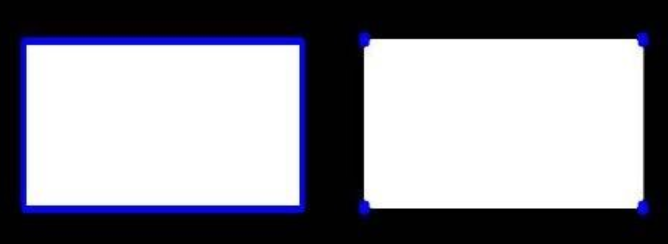

In [21]:
#为了更高的准确率，使用二值图像
img = cv2.imread('../0-Datas/images/contours.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
cv2_show('thresh',thresh)

In [22]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) #contours:轮廓点，hierachy:层级

In [23]:
#绘制轮廓
draw_img = img.copy()
res = cv2.drawContours(draw_img,contours,-1,(0,0,255),2) #-1:所有的轮廓，(0,0,255):BGR即红色，2:线条粗细
cv2_show('res',np.hstack((img,res)))

In [24]:
#轮廓特征（常用属性）
cnt = contours[0] #获取第一个轮廓
print(cv2.contourArea(cnt)) #计算面积
print(cv2.arcLength(cnt,True)) #计算周长，True表示闭合

8500.5
437.9482651948929


In [26]:
#轮廓近似（曲线之间找到离端点所连直线最大且小于阈值的直线）
img = cv2.imread('../0-Datas/images/contours2.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img,[cnt],-1,(0,0,255),2)
cv2_show('res',res)

In [27]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

draw_img = img.copy()
res = cv2.drawContours(draw_img,[approx],-1,(0,0,255),2)
cv2_show('res',res)

In [28]:
#边界矩形
img = cv2.imread('../0-Datas/images/contours.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = contours[10]

x,y,w,h = cv2.boundingRect(cnt)
imgs = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2_show('imgs',imgs)
print(float(cv2.contourArea(cnt))/float(w*h)) #轮廓面积与边界面积比

0.3442964480874317


In [31]:
#外接圆
img = cv2.imread('../0-Datas/images/sports.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = contours[10]

x,y,w,h = cv2.boundingRect(cnt)
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
imgs = cv2.circle(img,center,radius,(0,255,0),2)
cv2_show('imgs',imgs)

# 模板匹配
<br>

In [42]:
"""
matchTemplate(img,temple,result,method):
参数image:待搜索的图像(大图)
参数temple:搜索模板,需要和原图一样的数据类型且尺寸不能大于源图像
参数result:比较结果的映射图像,其必须为单通道,32位浮点型图像,如果原图(待搜索图像)尺寸为W*H,而temple尺寸为w*h,则result尺寸一定是
    (W-w+1)*(H-h+1)
参数method:指定匹配方法,有如下几种:
    TM_SQDIFF:平方差匹配法
    TM_SQDIFF_NORMED:归一化平方差匹配法
    TM_CCORR:相关匹配法
    TM_CCORR_NORMED:归一化相关匹配法
    TM_CCOEFF:系数匹配法
    TM_CCOEFF_NORMED:化相关系数匹配法
"""

'\nmatchTemplate(img,temple,result,method):\n参数image:待搜索的图像(大图)\n参数temple:搜索模板,需要和原图一样的数据类型且尺寸不能大于源图像\n参数result:比较结果的映射图像,其必须为单通道,32位浮点型图像,如果原图(待搜索图像)尺寸为W*H,而temple尺寸为w*h,则result尺寸一定是\n    (W-w+1)*(H-h+1)\n参数method:指定匹配方法,有如下几种:\n    TM_SQDIFF:平方差匹配法\n    TM_SQDIFF_NORMED:归一化平方差匹配法\n    TM_CCORR:相关匹配法\n    TM_CCORR_NORMED:归一化相关匹配法\n    TM_CCOEFF:系数匹配法\n    TM_CCOEFF_NORMED:化相关系数匹配法\n'

In [43]:
img = cv2.imread('../0-Datas/images/lena.jpg', 0)
template = cv2.imread('../0-Datas/images/face.jpg', 0)
th, tw = template.shape[:2]
print(img.shape)
print(template.shape)

res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
print(res.shape) #341-161+1=181,343-130+1=214

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
left_top = max_loc  # 左上角
right_bottom = (left_top[0] + th, left_top[1] + tw)  # 右下角
cv2.rectangle(img, left_top, right_bottom, 255, 2)  # 画出矩形位置

cv2_show('img',img)

(263, 263)
(110, 85)
(154, 179)


In [45]:
#匹配多个对象
img_rgb = cv2.imread('../0-Datas/images/mario.jpg')
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
templates = cv2.imread('../0-Datas/images/mario_coin.jpg',0)
h, w = templates.shape[:2]

res = cv2.matchTemplate(img_gray, templates, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
#取出匹配程度大于80%的坐标
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0, 0, 255), 2)
cv2.imshow('img_rgb',img_rgb)
cv2.waitKey(0)

-1